DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


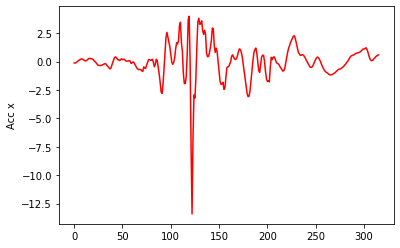

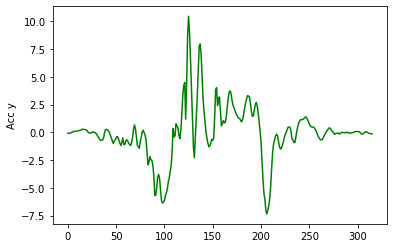

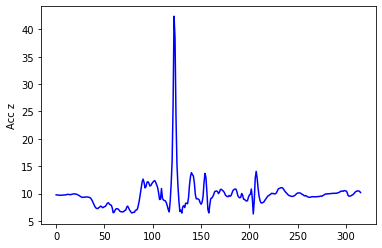

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

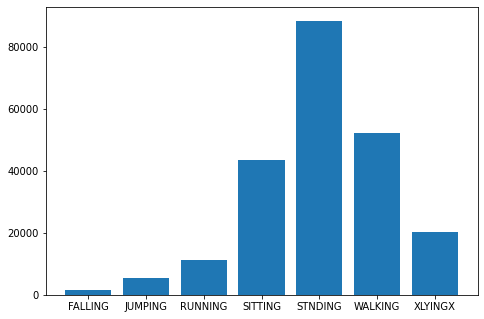

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
#import data_transformation as dt
#X_data, y_data = dt.data_augmentation(X_data, y_data, [dt.jitter])

In [12]:
from data_transformation import data_normalization
X_visual_norm = data_normalization(X_data[:20])

2021-09-03 12:12:11.612224: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-03 12:12:11.612360: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Text(0.5, 1.0, 'Norm Acc 1')

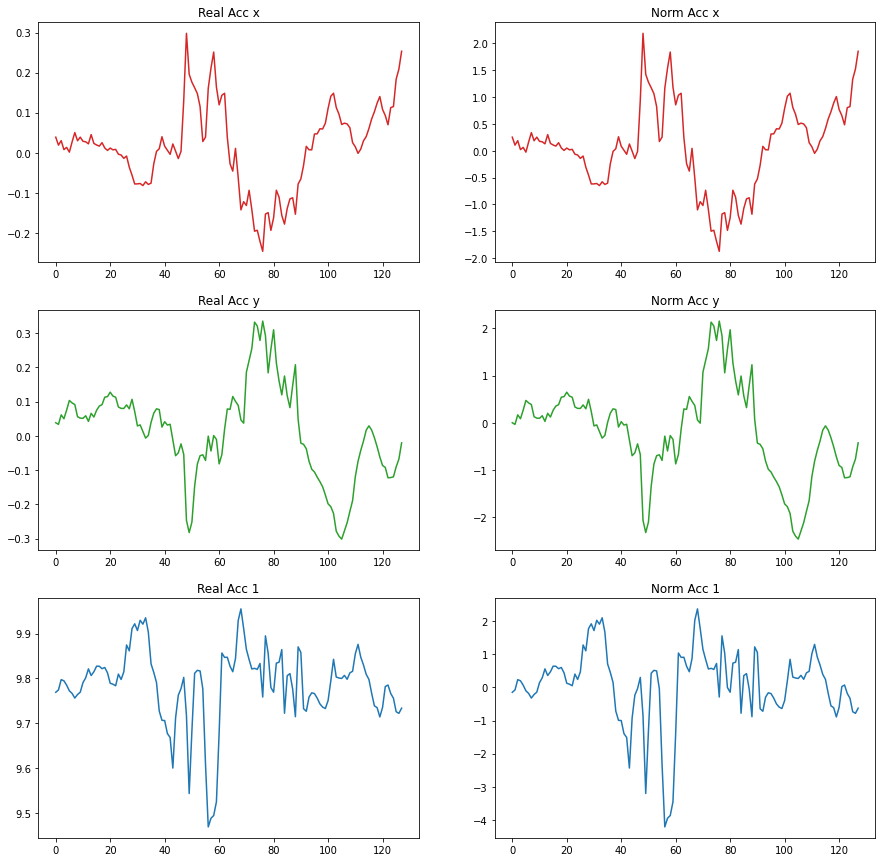

In [13]:
measure = 5
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_data[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_visual_norm[measure,:,0], 'tab:red')
axs[0, 1].set_title('Norm Acc x')

axs[1, 0].plot(X_data[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_visual_norm[measure,:,1], 'tab:green')
axs[1, 1].set_title('Norm Acc y')

axs[2, 0].plot(X_data[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_visual_norm[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Norm Acc 1')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)

In [15]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


Text(0.5, 1.0, 'Gyro z')

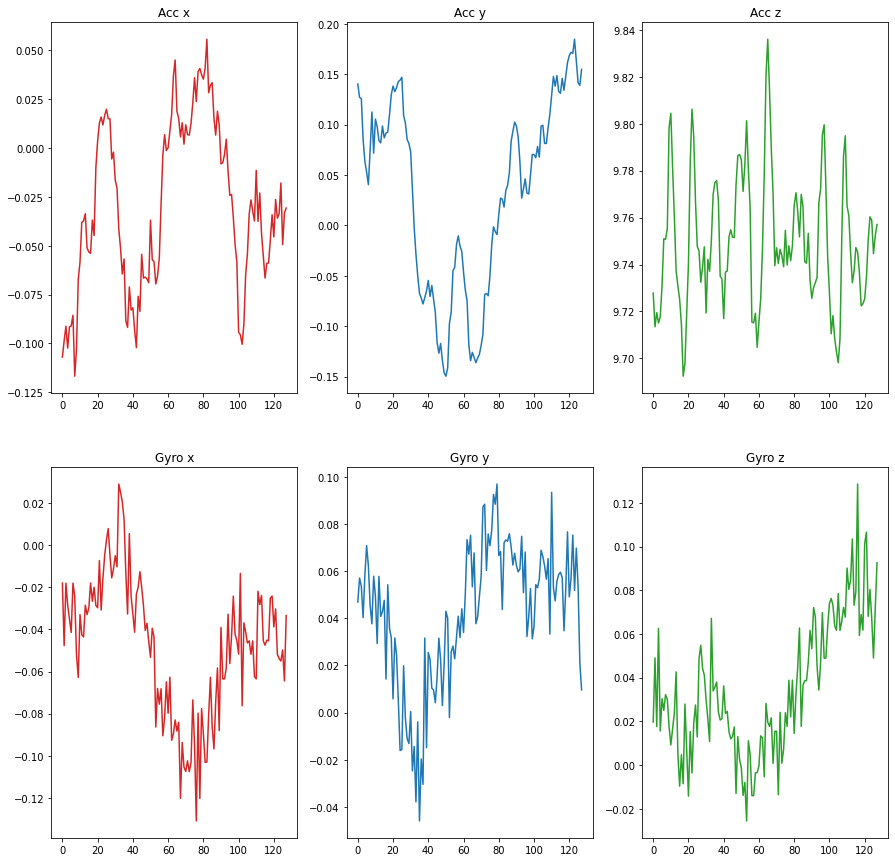

In [16]:
measure = 5
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Acc x')
axs[0, 1].plot(X_train[measure,:,1], 'tab:blue')
axs[0, 1].set_title('Acc y')
axs[0, 2].plot(X_train[measure,:,2], 'tab:green')
axs[0, 2].set_title('Acc z')

axs[1, 0].plot(X_train[measure,:,3], 'tab:red')
axs[1, 0].set_title('Gyro x')
axs[1, 1].plot(X_train[measure,:,4], 'tab:blue')
axs[1, 1].set_title('Gyro y')
axs[1, 2].plot(X_train[measure,:,5], 'tab:green')
axs[1, 2].set_title('Gyro z')

In [17]:
from data_transformation import data_normalization
from data_transformation import min_max_scaler

#X_train = min_max_scaler(X_train)
#X_test = min_max_scaler(X_test)

X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

In [18]:
print(X_train.shape)

(155666, 128, 6)


In [19]:
def plot_signal(signal):
    fig, axs = plt.subplots(2, 3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs[0, 0].plot(signal[:,0], 'tab:red')
    axs[0, 0].set_title('Acc x')
    axs[0, 1].plot(signal[:,1], 'tab:blue')
    axs[0, 1].set_title('Acc y')
    axs[0, 2].plot(signal[:,2], 'tab:green')
    axs[0, 2].set_title('Acc z')

    axs[1, 0].plot(signal[:,3], 'tab:red')
    axs[1, 0].set_title('Gyro x')
    axs[1, 1].plot(signal[:,4], 'tab:blue')
    axs[1, 1].set_title('Gyro y')
    axs[1, 2].plot(signal[:,5], 'tab:green')
    axs[1, 2].set_title('Gyro z')

STNDING


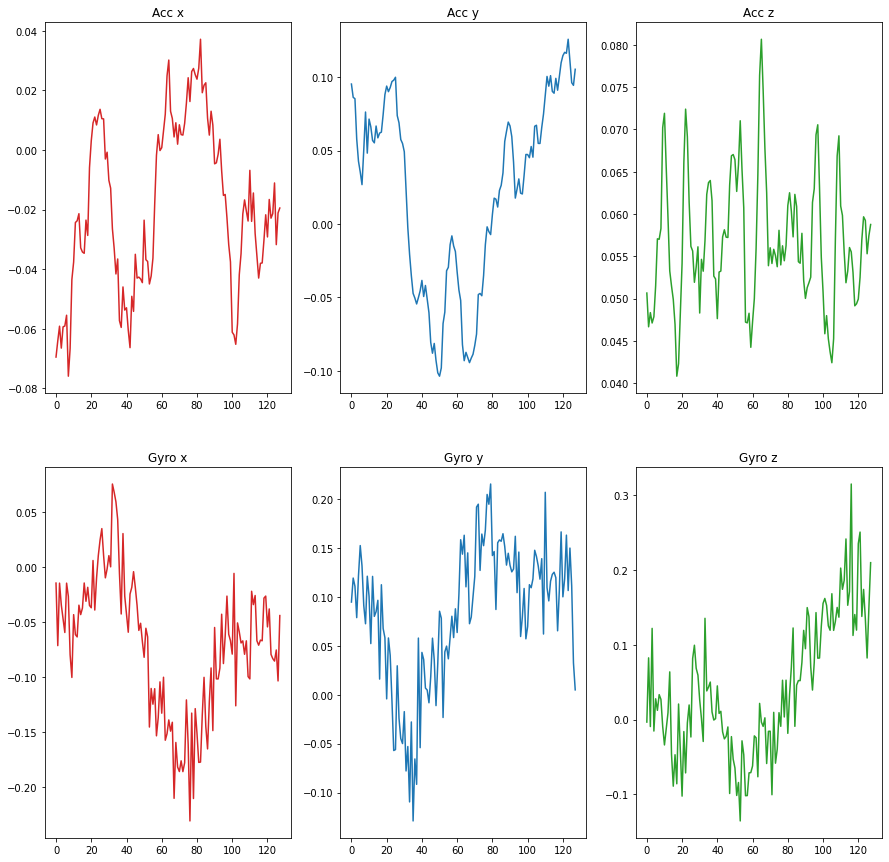

In [20]:
measure = 5
print(le.inverse_transform([y_train[measure]])[0])
plot_signal(X_train[measure])

In [21]:
encoded_space_dim = 64
signal_dimension = X_train.shape[-1]

encoder = tf.keras.models.Sequential(
        [
            layer.InputLayer(input_shape=(128, signal_dimension)),
            layer.Dropout(0.4),
            layer.Conv1D(filters=32, kernel_size=9, strides=2, activation='relu', padding='same'),
            layer.Conv1D(filters=64, kernel_size=7, strides=2, activation='relu', padding='same'),
            layer.Conv1D(filters=128, kernel_size=5, strides=2, activation='relu', padding='same'),
            layer.Conv1D(filters=256, kernel_size=3, strides=2, activation='relu', padding='same'),
            layer.Flatten(),
            layer.Dropout(rate=0.2),
            layer.Dense(encoded_space_dim),
        ], name="encoder"
    )

decoder = tf.keras.models.Sequential(
        [
            layer.InputLayer(input_shape=(encoded_space_dim)),
            layer.Dense(units=8*256, activation='relu'),
            layer.Reshape((8, 256)),
            layer.Conv1DTranspose(filters=128, kernel_size=5, strides=2, activation='relu', padding='same'),
            layer.Conv1DTranspose(filters=64, kernel_size=7, strides=2, activation='relu', padding='same'),
            layer.Conv1DTranspose(filters=32, kernel_size=9, strides=2, activation='relu', padding='same'),
            layer.Conv1DTranspose(filters=signal_dimension, kernel_size=3, strides=2, padding='same'),
        ], name="decoder"
    )

classifier = tf.keras.models.Sequential(
        [
            layer.Dense(512),
            layer.Dense(num_labels, activation='softmax'),
        ], name="classifier"
    )



In [22]:
from models import SSAE
autoencoder = SSAE(encoded_space_dim, encoder, decoder, classifier, alpha=0.1, beta=1.0)

autoencoder.predict(X_train[:10]).shape
autoencoder(X_train[:10]).shape

TensorShape([10, 128, 6])

In [ ]:
autoencoder.summary()

Model: "ssae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 64)                286944    
_________________________________________________________________
decoder (Sequential)         (None, 128, 6)            262950    
_________________________________________________________________
classifier (Sequential)      (10, 7)                   36871     
Total params: 586,771
Trainable params: 586,765
Non-trainable params: 6
_________________________________________________________________


In [ ]:
autoencoder.encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 128, 6)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 32)            1760      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 64)            14400     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 128)           41088     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 256)            98560     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0   

In [ ]:
autoencoder.decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              133120    
_________________________________________________________________
reshape (Reshape)            (None, 8, 256)            0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 16, 128)           98432     
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 32, 64)            24640     
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 64, 32)            6176      
_________________________________________________________________
conv1d_transpose_3 (Conv1DTr (None, 128, 6)            582       
Total params: 262,950
Trainable params: 262,950
Non-trainable params: 0
_____________________________________________________

In [ ]:
autoencoder.classifier.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (10, 512)                 33280     
_________________________________________________________________
dense_3 (Dense)              (10, 7)                   3591      
Total params: 36,871
Trainable params: 36,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()

autoencoder.compile(optimizer=optimizer)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = autoencoder.fit(X_train, y_train,
                epochs=100,
                shuffle=True,
                batch_size=128,
                validation_split=0.2,
                callbacks=[callback]
                )

Epoch 1/100
973/973 [==============================] - 23s 23ms/step - loss: 10.9521 - rec_loss: 81.6443 - pred_loss: 0.6867 - val_loss: 6.7018 - val_rec_loss: 61.4521 - val_pred_loss: 0.5566
Epoch 2/100
973/973 [==============================] - 23s 24ms/step - loss: 6.0568 - rec_loss: 51.0321 - pred_loss: 0.4760 - val_loss: 4.8045 - val_rec_loss: 44.0481 - val_pred_loss: 0.3997
Epoch 3/100
973/973 [==============================] - 24s 24ms/step - loss: 4.5521 - rec_loss: 41.0739 - pred_loss: 0.3542 - val_loss: 4.2300 - val_rec_loss: 38.9529 - val_pred_loss: 0.3347
Epoch 4/100
973/973 [==============================] - 23s 24ms/step - loss: 4.0712 - rec_loss: 36.8426 - pred_loss: 0.2902 - val_loss: 3.9708 - val_rec_loss: 36.9094 - val_pred_loss: 0.2799
Epoch 5/100
973/973 [==============================] - 23s 24ms/step - loss: 3.6408 - rec_loss: 34.3360 - pred_loss: 0.2515 - val_loss: 3.7299 - val_rec_loss: 34.6559 - val_pred_loss: 0.2643
Epoch 6/100
973/973 [=======================

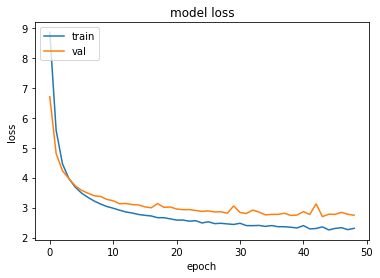

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_trans = autoencoder(X_train[:1000])

WALKING


Text(0.5, 1.0, 'Pred Acc 1')

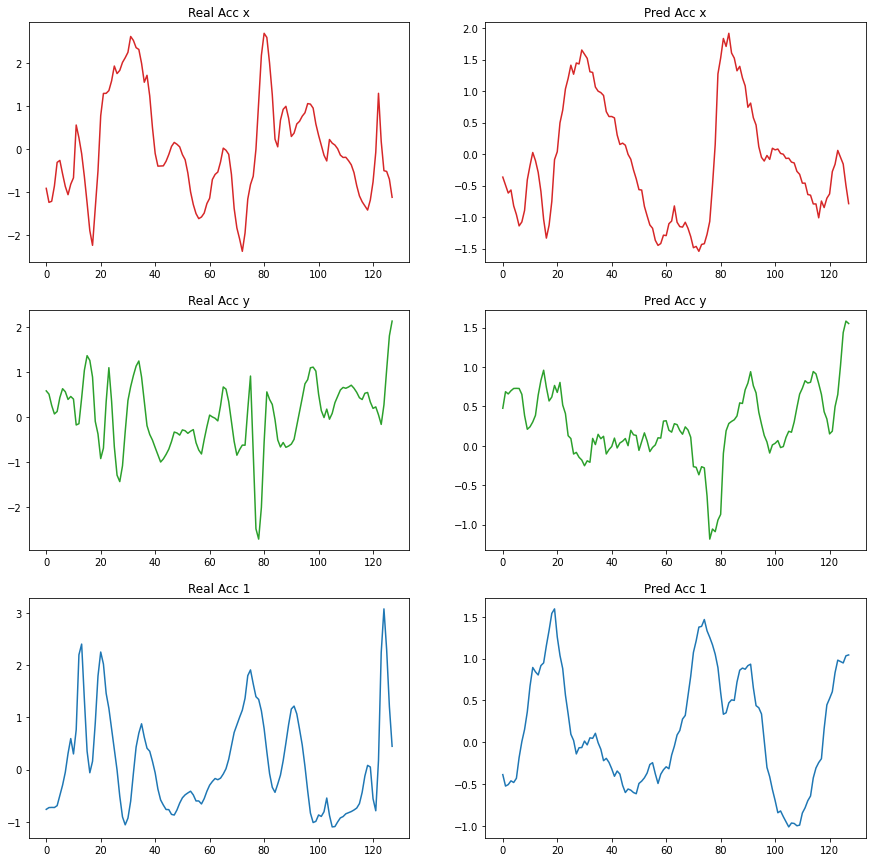

In [ ]:
measure = 24
label_measured = y_train[measure]
print(le.inverse_transform([label_measured])[0])
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_trans[measure,:,0], 'tab:red')
axs[0, 1].set_title('Pred Acc x')

axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_trans[measure,:,1], 'tab:green')
axs[1, 1].set_title('Pred Acc y')

axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_trans[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Pred Acc 1')

In [ ]:
### Get the encoded representation of the test samples
test_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = autoencoder.encode(sample)
    
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break
labels = np.array(labels)

In [ ]:
print(np.array(encoded_samples).shape)

(10000, 64)


In [ ]:
from sklearn import manifold
tsne = manifold.TSNE(2, init='pca', random_state=0).fit_transform(encoded_samples)

In [ ]:
labels = le.inverse_transform(labels) 

In [ ]:
import plotly.express as px
px.scatter(x=tsne[:,0], y=tsne[:,1], color=labels, opacity=0.7)

In [ ]:
y_pred = autoencoder.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_pred, y_test)

In [ ]:
np.trace(conf_mat) / np.sum(conf_mat)

0.9742336805815783

In [ ]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.90634441 0.93072824 0.99362864 0.94428825 0.98441082 0.99302132
 0.95403808]
Recall score:  [0.6993007  0.94131737 0.98377891 0.98048706 0.97127347 0.99175139
 0.95200655]


In [ ]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " Recall " + str(recalls[i]))

FALLING: Precision 0.9063444108761329 Recall 0.6993006993006993
JUMPING: Precision 0.9307282415630551 Recall 0.9413173652694611
RUNNING: Precision 0.993628640776699 Recall 0.9837789125863623
SITTING: Precision 0.944288250961823 Recall 0.9804870553891065
STNDING: Precision 0.9844108207244383 Recall 0.9712734675412803
WALKING: Precision 0.9930213201869518 Recall 0.9917513907538845
XLYINGX: Precision 0.9540380827314511 Recall 0.952006552006552


In [ ]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.7894736842105263
JUMPING: F1-score 0.935992855016374
RUNNING: F1-score 0.9886792452830189
SITTING: F1-score 0.9620472619002751
STNDING: F1-score 0.9777980189001481
WALKING: F1-score 0.9923859491970055
XLYINGX: F1-score 0.9530212347298516


In [ ]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

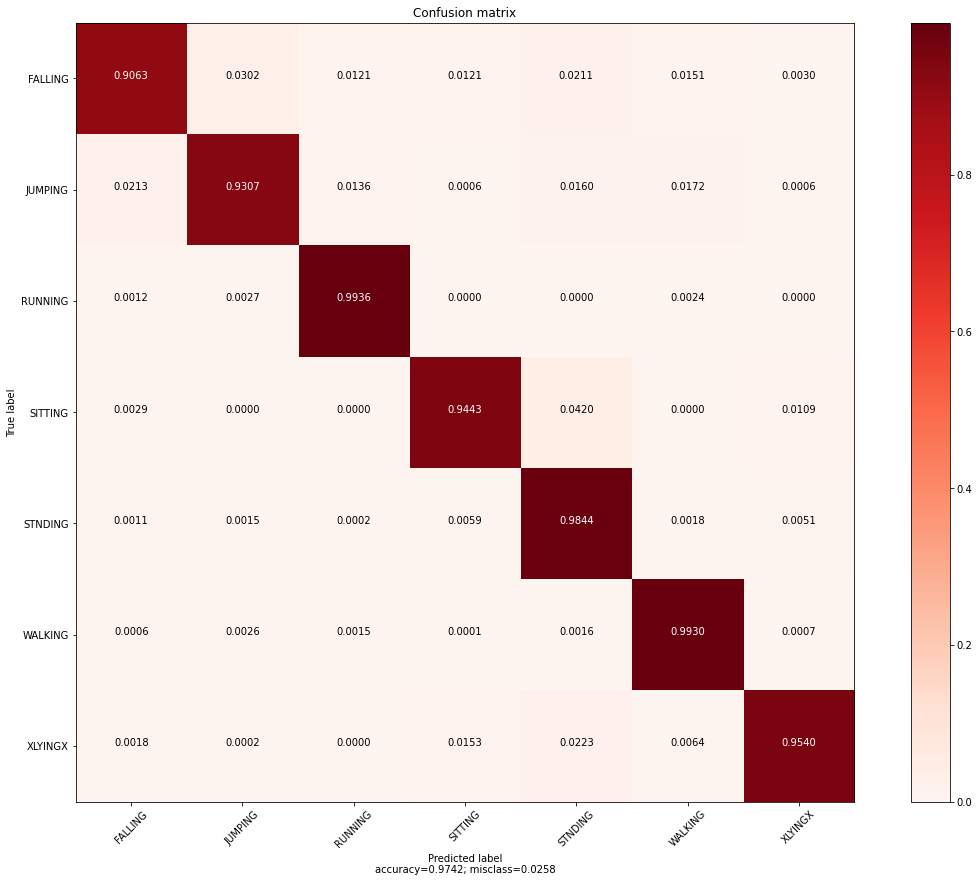

In [ ]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)

In [ ]:
autoencoder.save_model("best_SSAE_model")